


________________________________________

Working with $R^{+}$$\left( D_{5}, \  0\right)$

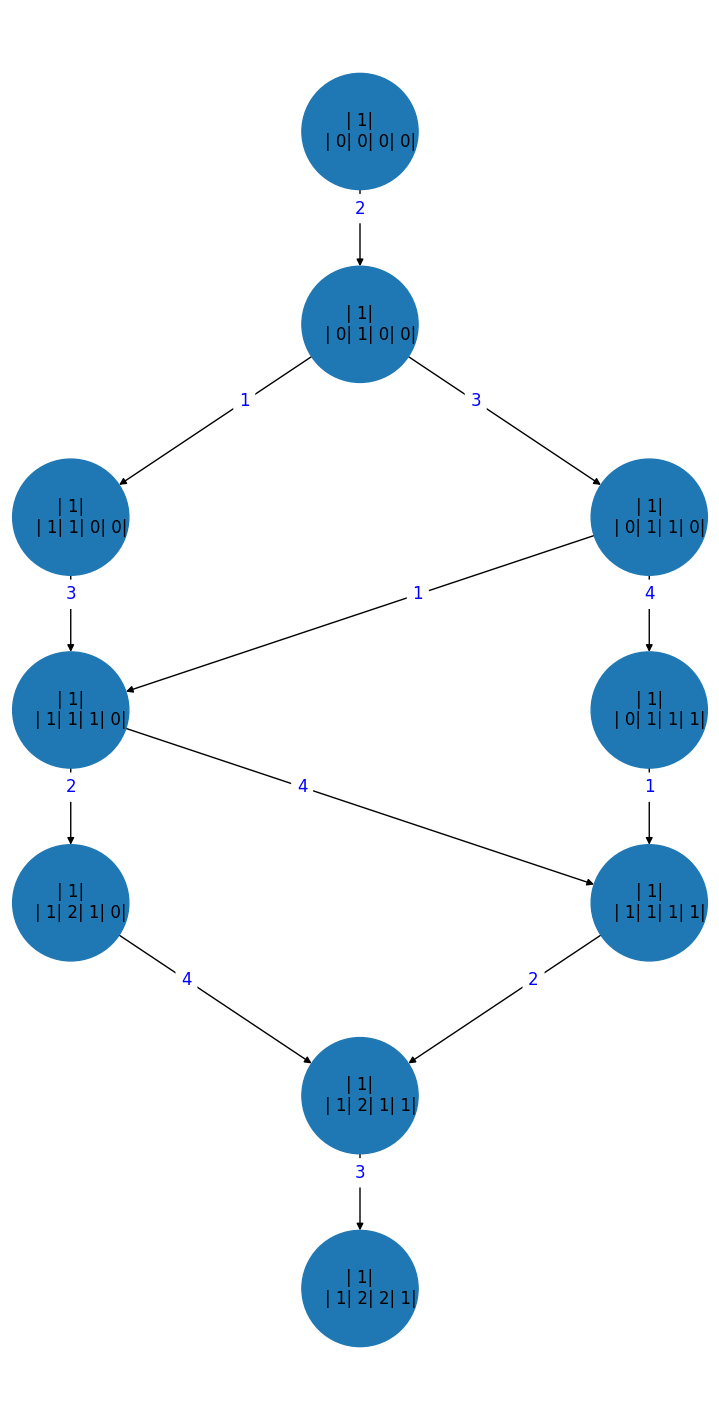

There are 5 alternative paths: [[2, 1, 3, 2, 4, 3], [2, 1, 3, 4, 2, 3], [2, 3, 1, 2, 4, 3], [2, 3, 1, 4, 2, 3], [2, 3, 4, 1, 2, 3]]





________________________________________

Working with $R^{+}$$\left( D_{5}, \  1\right)$

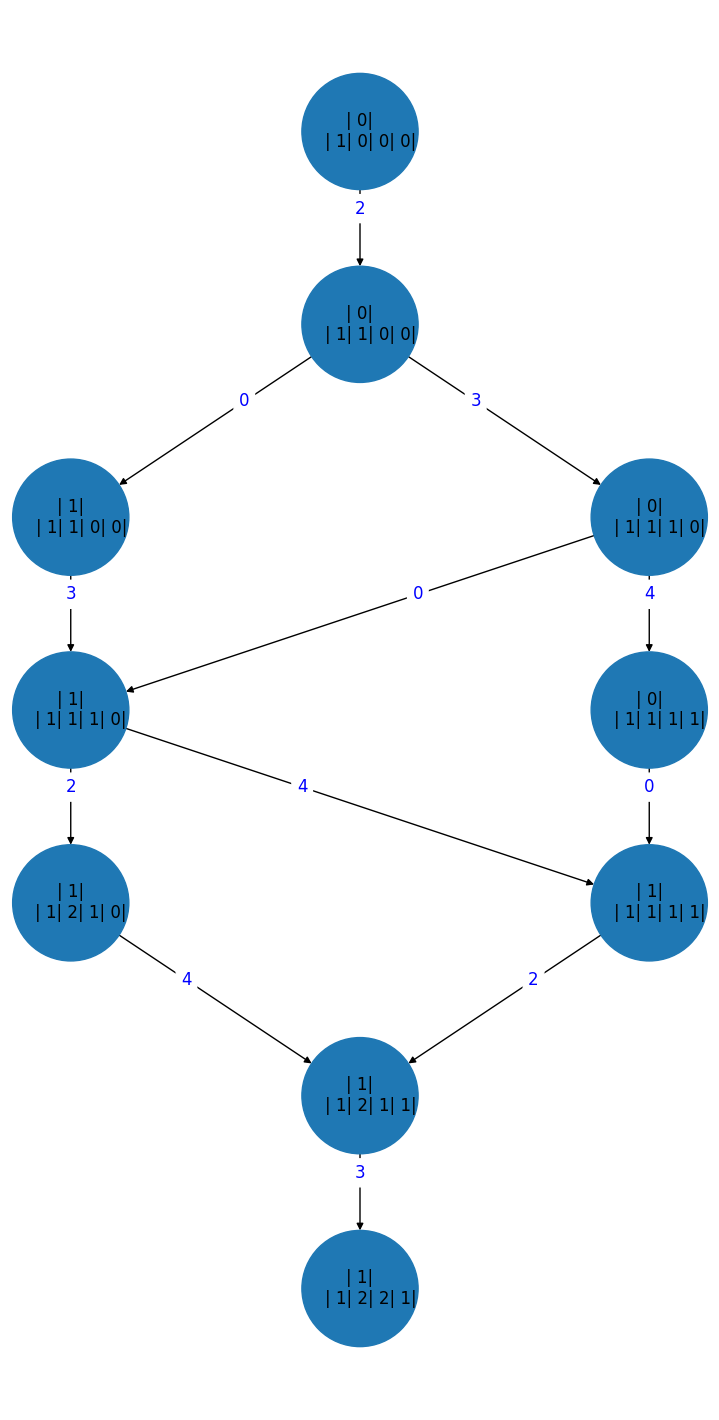

There are 5 alternative paths: [[2, 0, 3, 2, 4, 3], [2, 0, 3, 4, 2, 3], [2, 3, 0, 2, 4, 3], [2, 3, 0, 4, 2, 3], [2, 3, 4, 0, 2, 3]]





________________________________________

Working with $R^{+}$$\left( D_{5}, \  2\right)$

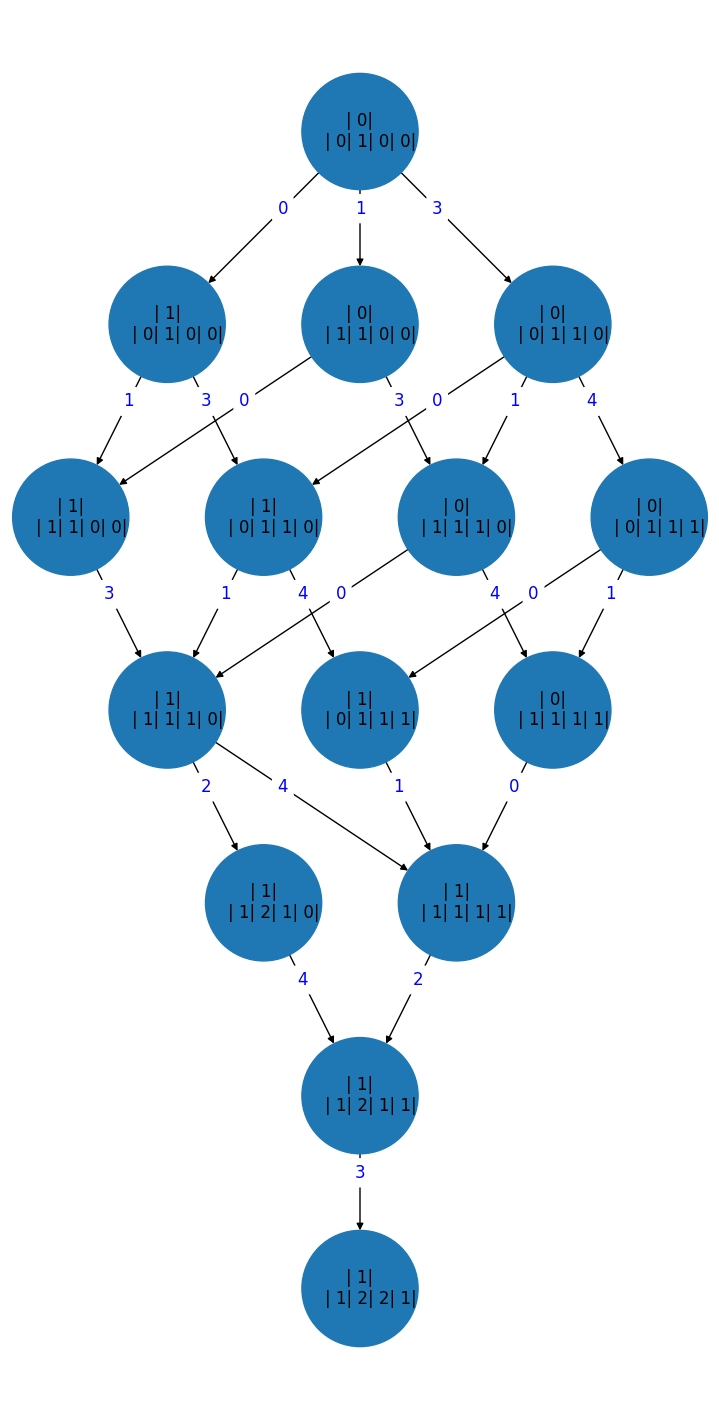

There are 18 alternative paths: [[0, 1, 3, 2, 4, 3], [0, 1, 3, 4, 2, 3], [0, 3, 1, 2, 4, 3], [0, 3, 1, 4, 2, 3], [0, 3, 4, 1, 2, 3], [1, 0, 3, 2, 4, 3], [1, 0, 3, 4, 2, 3], [1, 3, 0, 2, 4, 3], [1, 3, 0, 4, 2, 3], [1, 3, 4, 0, 2, 3], [3, 0, 1, 2, 4, 3], [3, 0, 1, 4, 2, 3], [3, 0, 4, 1, 2, 3], [3, 1, 0, 2, 4, 3], [3, 1, 0, 4, 2, 3], [3, 1, 4, 0, 2, 3], [3, 4, 0, 1, 2, 3], [3, 4, 1, 0, 2, 3]]





________________________________________

Working with $R^{+}$$\left( D_{5}, \  3\right)$

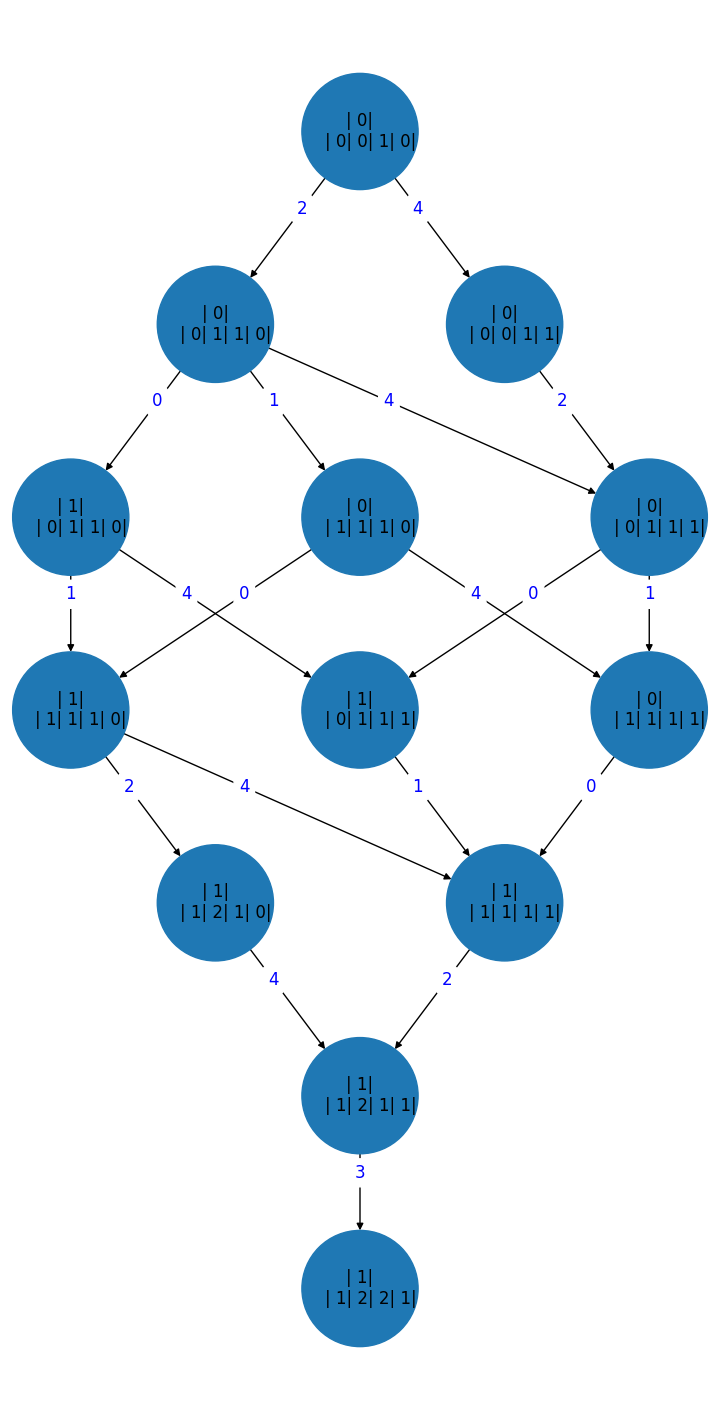

There are 10 alternative paths: [[2, 0, 1, 2, 4, 3], [2, 0, 1, 4, 2, 3], [2, 0, 4, 1, 2, 3], [2, 1, 0, 2, 4, 3], [2, 1, 0, 4, 2, 3], [2, 1, 4, 0, 2, 3], [2, 4, 0, 1, 2, 3], [2, 4, 1, 0, 2, 3], [4, 2, 0, 1, 2, 3], [4, 2, 1, 0, 2, 3]]





________________________________________

Working with $R^{+}$$\left( D_{5}, \  4\right)$

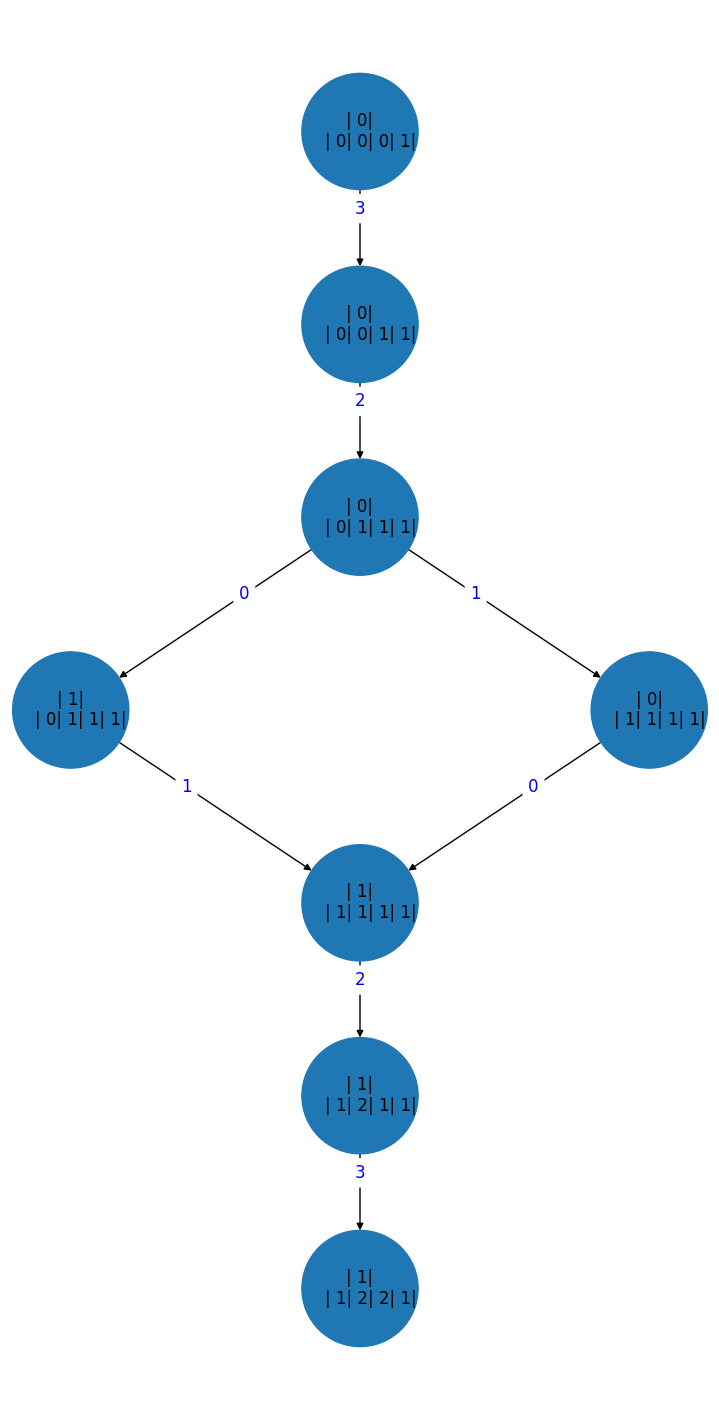

There are 2 alternative paths: [[3, 2, 0, 1, 2, 3], [3, 2, 1, 0, 2, 3]]


In [ ]:
# the following code generated the previous graphs
# Exersice from N. Wildberger, Dynamics on Graphs13 | Different Mutation Posets for D5 | Wild Egg Maths
# at https://www.patreon.com/posts/dynamics-on-for-73091914
# coding ideas from https://networkx.org/documentation/latest/auto_examples/graph/plot_morse_trie.html
from sympy import *
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, text
from IPython.display import display, Markdown, Math
init_session(use_latex=True)

%matplotlib inline


def update(population, graph):
    nx.set_node_attributes(graph, {node:population[node] for node in range(len(population))}, 'pop')

def calc_weights(population, structure):
    return [sum([population[col] * structure[col][row] for col in range(len(population))]) 
            for row in range(len(population))]

def display_D5(population):
    return '|'+str(population[0]).rjust(2)+"|\n    |"+"|".join([str(p).rjust(2) for p in population[1:]])+"|"

def increase(population, structure, length, tree, paths = [], path = []):
    weights = calc_weights(population, structure)
    m = max(weights)
    if m <= 0:
        paths.append(path)
        return
    nodes = [k for k in range(length) if weights[k] == m]
    parent = display_D5(population)
    for node in nodes:
        population[node] += m
        child = display_D5(population)
        try:
            tree[child].append((node, parent))
        except:
            tree[child] = [(node, parent)]
        increase(population, structure, length, tree, paths, path+[node])
        population[node] -= m

        

structure = [[-2,  0,  1,  0,  0],
             [ 0, -2,  1,  0,  0],
             [ 1,  1, -2,  1,  0],
             [ 0,  0,  1, -2,  1],
             [ 0,  0,  0,  1, -2]]

length = len(structure[0])
poset = []


for k in range(length):
    population = [0] * length
    population[k] = 1
    display(
            Markdown(
                    '\n\n\n________________________________________\n\n'+\
                'Working with {}{}'.format(latex(Symbol('R^+'), mode='inline'),latex((Symbol('D_5'), k), mode='inline')))
            )
    source = display_D5(population)
    tree = {source:[]}
    paths = []
    increase(population, structure, length, tree, paths)
    figure(figsize=(7,14))
    g = nx.DiGraph()
    edge_labels = {}
    for node in tree:
        g.add_node(node, label = node, size = 7000)
    for node in tree:
        for label, parent in tree[node]:
            g.add_edge(parent, node)
            edge_labels[(parent, node)] = label
    # For visualization purposes, layout the nodes in topological order
    for i, layer in enumerate(nx.topological_generations(g)):
        for n in layer:
            g.nodes[n]["layer"] = i
    pos = nx.multipartite_layout(g, subset_key="layer", align="horizontal")
    # Flip the layout so the root node is on top
    for k in pos:
        pos[k][-1] *= -10
        pos[k][-2] *= -10
    labels = nx.get_node_attributes(g, 'label')
    sizes = [size for size in nx.get_node_attributes(g, 'size').values()]
    nx.draw(g, pos=pos, with_labels=True, labels = labels, node_size = sizes)
    nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=edge_labels, font_color='blue', label_pos=.6, font_size=12, rotate=False)
    plt.show()
    print('There are', len(paths),'alternative paths:', paths)
    